### Analyse mobility rate during the COVID-19 pandemic in comparison with pre-lockdown

In [2]:

import pandas as pd
import io

In [9]:
import requests
url = 'https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv' #mobility data by Google


gfile = requests.get(url, allow_redirects=True)
open('gmobility_data.csv', 'wb').write(gfile.content) #get file and download it to folder

740542966

In [10]:
import csv
with open('gmobility_data.csv') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=",", quotechar='"')
    print(reader.fieldnames) #read columns


['country_region_code', 'country_region', 'sub_region_1', 'sub_region_2', 'metro_area', 'iso_3166_2_code', 'census_fips_code', 'place_id', 'date', 'retail_and_recreation_percent_change_from_baseline', 'grocery_and_pharmacy_percent_change_from_baseline', 'parks_percent_change_from_baseline', 'transit_stations_percent_change_from_baseline', 'workplaces_percent_change_from_baseline', 'residential_percent_change_from_baseline']


In [5]:
df=pd.read_csv('/home/jovyan/Analysis/Impacts-of-COVID-19/gmobility_data.csv') #load data

/home/jovyan/envs/python3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
data=df

In [14]:
#check mobility for Central Delhi, Delhi, India
data = data[ (data['country_region_code'] == 'IN') & (data['sub_region_1']=='Delhi') & (data['sub_region_2']=='Central Delhi') ]

In [15]:
data=data[:321]

In [16]:
y=data['retail_and_recreation_percent_change_from_baseline'].tolist() #use recreation and retail change to factor in mobility
x=data['date'].tolist()

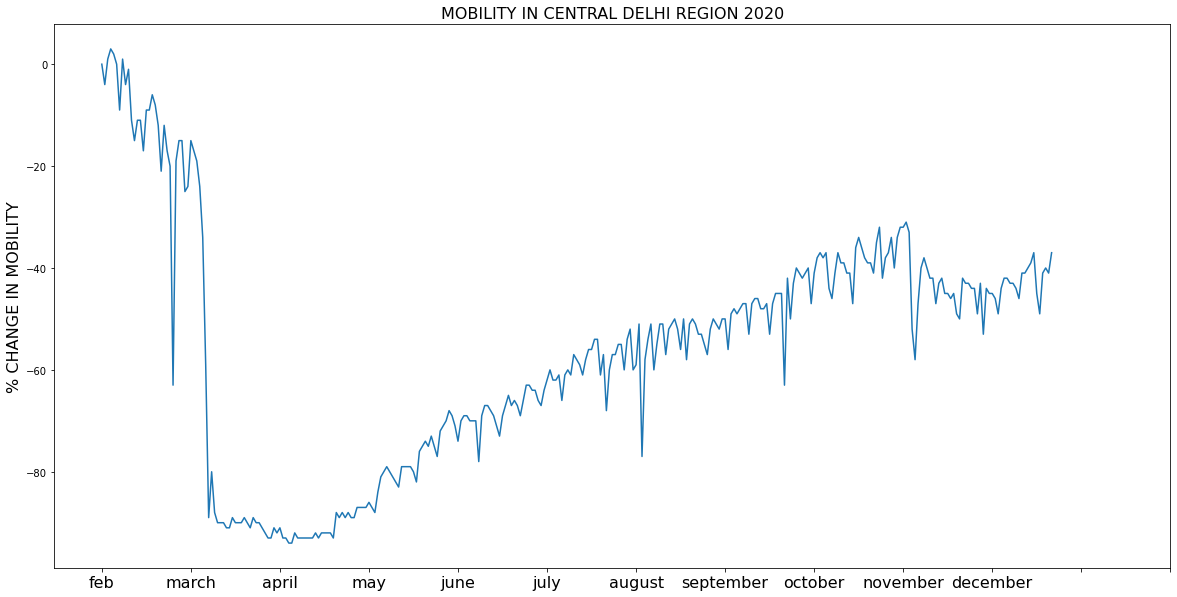

In [26]:
from matplotlib import pyplot as plt
plt.plot(x,y)
plt.rcParams["figure.figsize"] = (20,10)
#specify x-axis locations
x_ticks = [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360]
x_labels = ['feb','march','april','may','june','july','august','september','october','november','december']
plt.xticks(ticks=x_ticks, labels=x_labels , fontsize=16)
plt.ylabel("% CHANGE IN MOBILITY", fontsize=16)
plt.title('MOBILITY IN CENTRAL DELHI REGION 2020' , fontsize=16)
plt.show()